In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

## 데이터 준비

In [2]:
# !pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [3]:
# !gdown https://drive.google.com/uc?id=12FIGFL_-WnKTTOo8AC_eh3O1VNzvDeQP

Downloading...
From: https://drive.google.com/uc?id=12FIGFL_-WnKTTOo8AC_eh3O1VNzvDeQP
To: /content/MaskDatasets.zip
100% 216M/216M [00:00<00:00, 270MB/s]


In [4]:
# !unzip MaskDatasets.zip

Archive:  MaskDatasets.zip
   creating: MaskDatasets/
   creating: MaskDatasets/Test/
   creating: MaskDatasets/Test/Mask/
  inflating: MaskDatasets/Test/Mask/2070.jpg  
  inflating: MaskDatasets/Test/Mask/2072.jpg  
  inflating: MaskDatasets/Test/Mask/2083.jpg  
  inflating: MaskDatasets/Test/Mask/2085.jpg  
  inflating: MaskDatasets/Test/Mask/2086.jpg  
  inflating: MaskDatasets/Test/Mask/2110.jpg  
  inflating: MaskDatasets/Test/Mask/2113.jpg  
  inflating: MaskDatasets/Test/Mask/2114.jpeg  
  inflating: MaskDatasets/Test/Mask/2130.jpg  
  inflating: MaskDatasets/Test/Mask/2132.jpg  
  inflating: MaskDatasets/Test/Mask/2135.jpg  
  inflating: MaskDatasets/Test/Mask/2154.png  
  inflating: MaskDatasets/Test/Mask/2158.png  
  inflating: MaskDatasets/Test/Mask/2159.png  
  inflating: MaskDatasets/Test/Mask/2160.png  
  inflating: MaskDatasets/Test/Mask/2170.png  
  inflating: MaskDatasets/Test/Mask/2172.png  
  inflating: MaskDatasets/Test/Mask/2173.png  
  inflating: MaskDatasets/Test

In [5]:
import os

data_root = '/content/MaskDatasets'
train_dir = os.path.join(data_root, 'Train')
val_dir = os.path.join(data_root, 'Validation')
test_dir = os.path.join(data_root, 'Test')

In [6]:
train_mask_fname = os.listdir(os.path.join(train_dir, 'Mask'))
train_nomask_fname = os.listdir(os.path.join(train_dir, 'NoMask'))

val_mask_fname = os.listdir(os.path.join(val_dir, 'Mask'))
val_nomask_fname = os.listdir(os.path.join(val_dir, 'NoMask'))

test_mask_fname = os.listdir(os.path.join(test_dir, 'Mask'))
test_nomask_fname = os.listdir(os.path.join(test_dir, 'NoMask'))

print(len(train_mask_fname), len(train_nomask_fname))

300 300


In [7]:
import PIL

X_train = []
y_train = []

for i in range(len(train_mask_fname)):
  f = os.path.join(train_dir, 'Mask', train_mask_fname[i])
  image = PIL.Image.open(f)
  image = image.resize((224,224))
  arr = np.array(image)
  X_train.append(arr)
  y_train.append(1)

In [8]:
for i in range(len(train_nomask_fname)):
  f = os.path.join(train_dir, 'NoMask', train_nomask_fname[i])
  image = PIL.Image.open(f)
  image = image.resize((224,224))
  arr = np.array(image)
  X_train.append(arr)
  y_train.append(0)

In [9]:
len(X_train)

600

In [10]:
# 검증
X_val = []
y_val = []

for i in range(len(val_mask_fname)):
  f = os.path.join(val_dir, 'Mask', val_mask_fname[i])
  image = PIL.Image.open(f)
  image = image.resize((224,224))
  arr = np.array(image)
  X_val.append(arr)
  y_val.append(1)

for i in range(len(val_nomask_fname)):
  f = os.path.join(val_dir, 'NoMask', val_nomask_fname[i])
  image = PIL.Image.open(f)
  image = image.resize((224,224))
  arr = np.array(image)
  X_val.append(arr)
  y_val.append(0)

In [11]:
# 테스트
X_test = []
y_test = []

for i in range(len(test_mask_fname)):
  f = os.path.join(test_dir, 'Mask', test_mask_fname[i])
  image = PIL.Image.open(f)
  image = image.resize((224,224))
  arr = np.array(image)
  X_test.append(arr)
  y_test.append(1)

for i in range(len(test_nomask_fname)):
  f = os.path.join(test_dir, 'NoMask', test_nomask_fname[i])
  image = PIL.Image.open(f)
  image = image.resize((224,224))
  arr = np.array(image)
  X_test.append(arr)
  y_test.append(0)

In [12]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(600, 224, 224, 3) (600,)
(306, 224, 224, 3) (306,)
(100, 224, 224, 3) (100,)


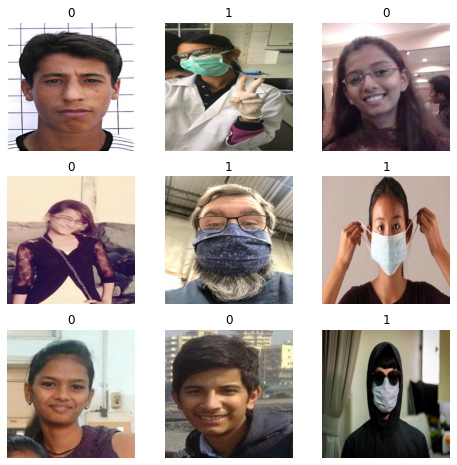

In [73]:
samples = np.random.randint(len(X_train), size= 9)
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[idx])
    plt.axis('off')
    plt.title(y_train[idx])
plt.show()

## 정규화

In [13]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [14]:
y_train[:5]

array([1, 1, 1, 1, 1])

In [15]:
X_train.shape

(600, 224, 224, 3)

## 모델

In [60]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

In [74]:
model = keras.Sequential([
    layers.Conv2D(32, 3, input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),

    layers.Conv2D(64, 3),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),

    layers.Conv2D(128, 3),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [75]:
# model.summary()

In [76]:
from tensorflow.keras import callbacks

callpath = 'call.ckpt'
callpoint = callbacks.ModelCheckpoint(
    callpath,
    monitor = 'val_loss',
    save_weights_only = True,
    save_best_only = True,
    verbose = 1
)

In [77]:
es_callback = callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 5
)

In [78]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val,y_val),
                callbacks = [callpoint, es_callback],
                verbose = 1)

Epoch 1/30
19/19 [==============================] - ETA: 0s - loss: 6.7224 - acc: 0.7317
Epoch 1: val_loss improved from inf to 0.93585, saving model to call.ckpt
19/19 [==============================] - 3s 117ms/step - loss: 6.7224 - acc: 0.7317 - val_loss: 0.9358 - val_acc: 0.4444
Epoch 2/30
19/19 [==============================] - ETA: 0s - loss: 0.2566 - acc: 0.9067
Epoch 2: val_loss improved from 0.93585 to 0.64702, saving model to call.ckpt
19/19 [==============================] - 2s 102ms/step - loss: 0.2566 - acc: 0.9067 - val_loss: 0.6470 - val_acc: 0.6242
Epoch 3/30
19/19 [==============================] - ETA: 0s - loss: 0.1932 - acc: 0.9383
Epoch 3: val_loss did not improve from 0.64702
19/19 [==============================] - 2s 93ms/step - loss: 0.1932 - acc: 0.9383 - val_loss: 0.7460 - val_acc: 0.5425
Epoch 4/30
19/19 [==============================] - ETA: 0s - loss: 0.1602 - acc: 0.9300
Epoch 4: val_loss improved from 0.64702 to 0.59207, saving model to call.ckpt
19/19

## 평가

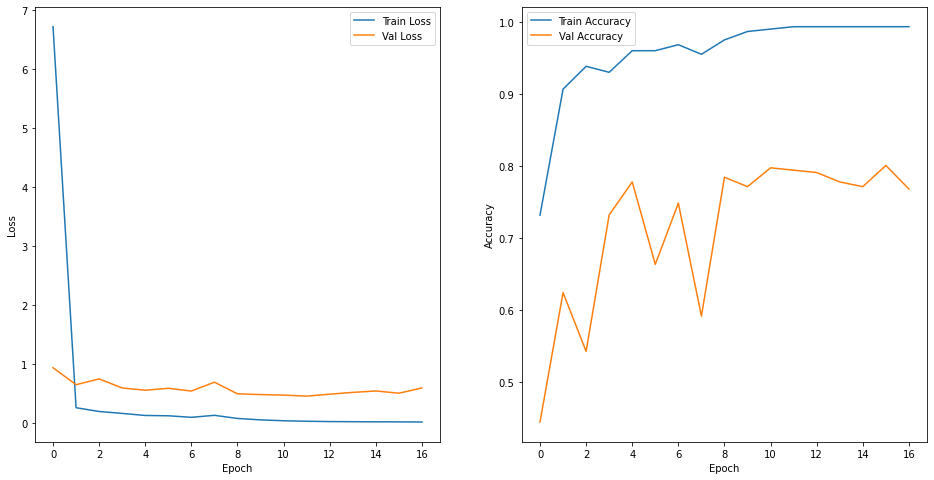

In [79]:
plot_history(log)

In [80]:
model.load_weights(callpath)

In [81]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 23ms/step - loss: 0.4879 - acc: 0.7600


[0.4879438877105713, 0.7599999904632568]

In [82]:
y_pred = model.predict(X_test)
y_pred[:5]

4/4 [==============================] - 0s 24ms/step


array([[0.66643745],
       [0.47201133],
       [0.35874748],
       [0.77186996],
       [0.7188171 ]], dtype=float32)

In [83]:
y_pred = (y_pred > 0.5).astype(int).reshape(-1)
y_pred[:5]

array([1, 0, 0, 1, 1])

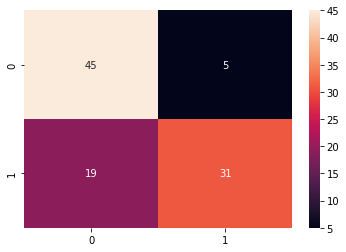

In [84]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='1g')

## 튜닝